In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install scikit-surprise

In [3]:
netflix_dataset = pd.read_csv('/content/drive/MyDrive/Netflix_dataset/combined_data_1.csv', header = None, usecols = [0,1], names = ['CustID', 'Rating'])

In [4]:
netflix_dataset.head()

,CustID,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [5]:
netflix_dataset.shape

(24058263, 2)

In [6]:
## Total Movie Count
movie_count = netflix_dataset['Rating'].isnull().sum()
print(f'Total Number Of Movies in Dataset Is: {movie_count}')

Total Number Of Movies in Dataset Is: 4499


In [7]:
# Total length of dataset
length = len(netflix_dataset['Rating'])
print(f'Total Lenght Of Dataset Is: {length}')

Total Lenght Of Dataset Is: 24058263


In [8]:
# Total rating given by customers
rating_count = length - movie_count
print(f'Total Number Ratings given by diff customers in the dataset is : {rating_count}')

Total Number Ratings given by diff customers in the dataset is : 24053764


In [9]:
## Checking rating distribution
netflix_dataset['Rating'].value_counts()

,count
Rating,
4.0,8085741
3.0,6904181
5.0,5506583
2.0,2439073
1.0,1118186


<Axes: xlabel='Ratings', ylabel='Rating Count'>

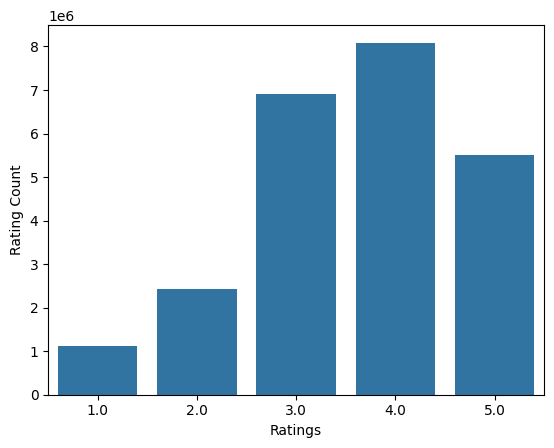

In [10]:
X = netflix_dataset['Rating'].value_counts().index
Y = netflix_dataset['Rating'].value_counts().values
plt.xlabel('Ratings')
plt.ylabel('Rating Count')
sns.barplot(x=X,y=Y)

In [11]:
# Since the data is too big, i am reducing the size of the data to 500K rows.
df = netflix_dataset.iloc[:500000,:]
df.head()

,CustID,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [12]:
df.isnull().sum()   ## Find movlies count in reduced data

,0
CustID,0
Rating,148


In [13]:
## Craeting 3rd colum called movie_id
current_movie = None
movie_list = []
for i in df['CustID']:
    if ':' in i:
        current_movie = int(i.replace(':', ''))
    movie_list.append(current_movie)

df['movie_id'] = movie_list

In [14]:
## Dropping Nan post creating new column movie_id
df.dropna(inplace=True)

In [15]:
## Reseting index post creating new column movie_id
df = df.reset_index()
df.head()

,index,CustID,Rating,movie_id
0,1,1488844,3.0,1
1,2,822109,5.0,1
2,3,885013,4.0,1
3,4,30878,4.0,1
4,5,823519,3.0,1


In [16]:
## Dropping uneanted columns
df = df.drop(columns =['index'], axis=1)
df.head()

,CustID,Rating,movie_id
0,1488844,3.0,1
1,822109,5.0,1
2,885013,4.0,1
3,30878,4.0,1
4,823519,3.0,1


***Find out the list of most popular and liked Movies***

In [17]:
# find which movie has been rated most number of times.
movie_rating_count=df.groupby('movie_id').Rating.count()
movie_rating_count=pd.DataFrame(movie_rating_count)
print("Movie with max number of Ratings (hence most popular) is ")
movie_rating_count[movie_rating_count['Rating']==movie_rating_count['Rating'].max()]

Movie with max number of Ratings (hence most popular) is 


,Rating
movie_id,
30,118413


In [18]:
# find which movie has received maximum average rating (Popularity limited to space)
movie_rating_mean=df.groupby('movie_id').Rating.mean()
movie_rating_mean=pd.DataFrame(movie_rating_mean)
print("Movie with Max average rating (hence most liked movie) is")
movie_rating_mean[movie_rating_mean['Rating']==movie_rating_mean['Rating'].max()]

Movie with Max average rating (hence most liked movie) is


,Rating
movie_id,
13,4.552


In [19]:
## Min threshold of no. of rating per movie to be considered for new viewer (Customer)
movie_threshold=round(movie_rating_count['Rating'].quantile(0.6),0)
print("A min threshold of number of ratings per movie at 60th percentile is :",movie_threshold)

A min threshold of number of ratings per movie at 60th percentile is : 765.0


In [20]:
## List of movies whose no of ratings=popularity less than thresholgd that is 908
movies_droplist = movie_rating_count[movie_rating_count['Rating']<movie_threshold].index
print("list of movies to be dropped since the number of ratings received is less than threshold: \n",movies_droplist)

list of movies to be dropped since the number of ratings received is less than threshold: 
 Index([  1,   2,   4,   7,   9,  10,  11,  12,  13,  14,  15,  19,  20,  21,
        22,  23,  27,  29,  31,  34,  37,  39,  40,  41,  42,  43,  49,  50,
        51,  53,  54,  59,  60,  61,  62,  63,  64,  65,  66,  67,  69,  70,
        72,  73,  74,  75,  80,  82,  85,  86,  87,  90,  91,  92,  93,  94,
        96,  98,  99, 100, 101, 102, 103, 105, 109, 112, 114, 115, 119, 120,
       121, 123, 124, 128, 129, 130, 131, 134, 135, 136, 137, 139, 140, 141,
       142, 144, 145, 146, 147],
      dtype='int64', name='movie_id')


In [21]:
## Creating list of customer who have given atleast threshold no. of ratings and need to find that threshold
cust_summary=df.groupby('CustID').Rating.count()
cust_summary=pd.DataFrame(cust_summary)
cust_summary

,Rating
CustID,
1000033,2
1000035,1
1000038,1
100006,2
1000062,3
...,...
99993,3
999935,1
999944,4


In [22]:
## Min no of movies watch per customer to become eligible to get counted for new veiwer.
cust_threshold=cust_summary['Rating'].quantile(0.6)
print("Min Number of movies watched per customer to become eligible to get counted :\n",cust_threshold)

Min Number of movies watched per customer to become eligible to get counted :
 2.0


In [23]:
## How many people have watech lee than threshold.
customer_droplist = cust_summary[cust_summary['Rating']<cust_threshold].index
print("list of customers to be dropped since the number of ratings received is less than threshold:\n",customer_droplist)

list of customers to be dropped since the number of ratings received is less than threshold:
 Index(['1000035', '1000038', '1000084', '1000094', '1000105', '1000153',
       '1000158', '1000176', '1000183', '1000264',
       ...
       '999796', '999800', '999844', '999894', '999895', '999901', '999907',
       '999935', '999984', '999988'],
      dtype='object', name='CustID', length=103947)


In [24]:
movies=pd.read_csv('/content/drive/MyDrive/Netflix_dataset/movies.csv', encoding='ISO-8859-1')
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund fÃ¼r's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [25]:
## Countimg diff types of geners
df_genre_count=movies.groupby('genres').movieId.count()
df_genre_count=pd.DataFrame(df_genre_count)
df_genre_count

,movieId
genres,
(no genres listed),246
Action,178
Action|Adventure,86
Action|Adventure|Animation,18
Action|Adventure|Animation|Children,8
...,...
Thriller|War,9
Thriller|Western,2
War,32


In [26]:
df_genre_count=df_genre_count.reset_index()
df_genre_count

,genres,movieId
0,(no genres listed),246
1,Action,178
2,Action|Adventure,86
3,Action|Adventure|Animation,18
4,Action|Adventure|Animation|Children,8
...,...,...
1337,Thriller|War,9
1338,Thriller|Western,2
1339,War,32
1340,War|Western,3


*Most Popular Genre*

In [27]:
print("Most Popular Genre :\n")
df_genre_count[df_genre_count['movieId']==df_genre_count['movieId'].max()]

Most Popular Genre :



,genres,movieId
1142,Drama,4520


*Least Popular Genres*

In [28]:
print("Least Popular Genre :\n")
df_genre_count[df_genre_count['movieId']==df_genre_count['movieId'].min()]

Least Popular Genre :



,genres,movieId
8,Action|Adventure|Animation|Children|Comedy|Rom...,1
10,Action|Adventure|Animation|Children|Comedy|Sci...,1
11,Action|Adventure|Animation|Children|Comedy|Wes...,1
15,Action|Adventure|Animation|Comedy,1
16,Action|Adventure|Animation|Comedy|Crime|Mystery,1
...,...,...
1330,Sci-Fi|IMAX,1
1332,Sci-Fi|Thriller|IMAX,1
1333,Sci-Fi|Thriller|War,1
1334,Sci-Fi|Thriller|Western,1


*Create Model that finds the best suited Movie for one user in every genre*

In [29]:
## Dropping less than threshold movies from original dataframe
df=df[~df['movie_id'].isin(movies_droplist)]
df.head()

,CustID,Rating,movie_id
692,1025579,4.0,3
693,712664,5.0,3
694,1331154,4.0,3
695,2632461,3.0,3
696,44937,5.0,3


In [30]:
## Dropping less than threshold customerID from original dataframe
df=df[~df['CustID'].isin(customer_droplist)]
df

,CustID,Rating,movie_id
693,712664,5.0,3
694,1331154,4.0,3
695,2632461,3.0,3
696,44937,5.0,3
697,656399,4.0,3
...,...,...,...
499847,1957556,4.0,148
499848,1492198,3.0,148
499849,1018901,3.0,148
499850,213704,4.0,148


In [31]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate

In [32]:
reader = Reader()

In [33]:
data=Dataset.load_from_df(df[['CustID','Rating','movie_id']],reader)

In [34]:
svd=SVD()

In [35]:
cross_validate(svd,data,measures=['RMSE', 'MAE'],cv=3, verbose=False)

{'test_rmse': array([76.82682524, 76.8889102 , 77.0105852 ]),
 'test_mae': array([63.5922791 , 63.7158991 , 63.81598382]),
 'fit_time': (8.101620197296143, 5.567643642425537, 7.014355182647705),
 'test_time': (1.2311406135559082, 1.3926217555999756, 1.0916829109191895)}

In [36]:
user_1331154=movies.copy()

In [37]:
user_1331154

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund fÃ¼r's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [38]:
user_1331154=user_1331154[~user_1331154['movieId'].isin(movies_droplist)]

In [39]:
user_1331154

,movieId,title,genres
2,3,Grumpier Old Men (1995),Comedy|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
7,8,Tom and Huck (1995),Adventure|Children
15,16,Casino (1995),Crime|Drama
...,...,...,...
27273,131254,Kein Bund fÃ¼r's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [40]:
## Creating trainig set & Model training
trainset = data.build_full_trainset()
svd.fit(trainset)

In [41]:
## calculating estimare_score for every movieid given by below user id
user_1331154['Estimate_Score'] = user_1331154['movieId'].apply(lambda x: svd.predict(1331154, x).est)

In [42]:
user_1331154=user_1331154.sort_values('Estimate_Score', ascending=False)

In [43]:
user_1331154 = user_1331154.drop('movieId', axis = 1)

In [44]:
user_1331154

,title,genres,Estimate_Score
2,Grumpier Old Men (1995),Comedy|Romance,5
18223,Safe in Hell (1931),Drama,5
18221,Easier with Practice (2009),Drama|Romance,5
18220,"Inconvenient Tax, An (2011)",Documentary,5
18219,Moonlight and Cactus (1944),Comedy|Musical|Western,5
...,...,...,...
9148,Destiny (Al-massir) (1997),Comedy|Drama|Musical|Romance,5
9147,Kiss or Kill (1997),Crime|Drama|Thriller,5
9146,Chicago Cab (a.k.a. Hellcab) (1998),Comedy|Drama,5
9145,Commander Hamilton (Hamilton) (1998),Action|Crime,5
